In [10]:
import csv
import pandas as pd

data_book = pd.read_csv('train_cniot_book.csv', header=None, names=['data'])
data_book


,data
0,The th century was the era of the great mecha...
1,The th century was the age of the steam engine
2,During the th century the key technology was...
3,Among other developments we saw the installat...
4,As a result of rapid technological progress t...
...,...
21646,The program should take plaintext from the sta...
21647,The encryption should be carried out character...
21648,For this problem you are allowed to select an...
21649,You may select any output format as long as i...


In [11]:
import gensim
from nltk.stem import WordNetLemmatizer
# nltk.download('omw-1.4')
def ls(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')


# Tokenize and lemmatize
def pp(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS:   # for dbms  and len(token) > 3
            result.append(ls(token))

    return result

# print("\n")
prepro_data = []
for index,line in data_book.iterrows():
    prepro_data.append(pp(line['data']))

if __name__ == "__main__":
    print(prepro_data)

[['th', 'century', 'era', 'great', 'mechanical', 'systems', 'accompany', 'industrial', 'revolution'], ['th', 'century', 'age', 'steam', 'engine'], ['th', 'century', 'key', 'technology', 'information', 'gather', 'process', 'distribution'], ['developments', 'saw', 'installation', 'worldwide', 'telephone', 'network', 'invention', 'radio', 'television', 'birth', 'unprecedented', 'growth', 'industry', 'launch', 'communication', 'satellite', 'course', 'internet'], ['result', 'rapid', 'technological', 'progress', 'areas', 'rapidly', 'converge', 'st', 'century', 'differences', 'collect', 'transport', 'store', 'process', 'information', 'quickly', 'disappear'], ['organizations', 'hundreds', 'offices', 'spread', 'wide', 'geographical', 'area', 'routinely', 'expect', 'able', 'examine', 'current', 'status', 'remote', 'outpost', 'push', 'button'], ['ability', 'gather', 'process', 'distribute', 'information', 'grow', 'demand', 'sophisticate', 'information', 'process', 'grow', 'faster'], ['industry', 

In [25]:
# importing libraries
import pandas as pd
import numpy as np
from gsdmm import MovieGroupProcess

# create dictionary of all words in all documents
dictionary = gensim.corpora.Dictionary(prepro_data)

# create variable containing length of dictionary/vocab
vocab_length = len(dictionary)
# print(vocab_length)

# create BOW dictionary
bow_corpus = [dictionary.doc2bow(doc) for doc in prepro_data]
# print(bow_corpus)

# initialize GSDMM
gsdmm = MovieGroupProcess(K=100, alpha=0.1, beta=0.3, n_iters=10)
# print(gsdmm)

# fit GSDMM model
y = gsdmm.fit(prepro_data, vocab_length)
# print(y)

# print number of documents per topic
doc_count = np.array(gsdmm.cluster_doc_count)
# print(gsdmm.cluster_doc_count)
print('Number of documents per topic :', doc_count)

# Topics sorted by the number of document they are allocated to
top_index = doc_count.argsort()[-15:][::-1]
# print(doc_count.argsort())
print('Most important clusters (by number of docs inside):', top_index)

# define function to get top words per topic
for_wcloud = []
topics = []
def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        sort_dicts = sorted(cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        sort_dicts = dict(sort_dicts)
        sum = 0
        topic = []
        for ky in sort_dicts:
            sum += sort_dicts[ky]
            topic.append(ky)
        for ky in sort_dicts:
            sort_dicts[ky] /= sum
            sort_dicts[ky] = round(sort_dicts[ky], 2)

        if len(sort_dicts) == 0:
            continue
        for_wcloud.append(sort_dicts)
        print("\nCluster %s : %s"%(cluster, sort_dicts))
        # topic = []
        # # iterate over top n words in topic
        # for k, v in sort_dicts:
        #     # append words to topic list
        #     topic.append(k)

        # append topics to topics list
        topics.append(topic)
    return topics

# get top words in topics
topics = top_words(gsdmm.cluster_word_distribution, top_index, 8)
# print(gsdmm.cluster_word_distribution)



In stage 0: transferred 21133 clusters with 100 clusters populated
In stage 1: transferred 11928 clusters with 96 clusters populated
In stage 2: transferred 5839 clusters with 53 clusters populated
In stage 3: transferred 4801 clusters with 35 clusters populated
In stage 4: transferred 4512 clusters with 33 clusters populated
In stage 5: transferred 4364 clusters with 24 clusters populated
In stage 6: transferred 4313 clusters with 24 clusters populated
In stage 7: transferred 4389 clusters with 25 clusters populated
In stage 8: transferred 4328 clusters with 21 clusters populated
In stage 9: transferred 4266 clusters with 20 clusters populated
Number of documents per topic : [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0  101 4685    0    0    0    0    0    0    0    0    0    3    0
 1731 1484    0    0    0    6    0    0    0    0    0 4429 1252    0
    4    0    0 1387    0    1    0    0    0    0    0    0    2    0
    0    1    0    0    0    0 

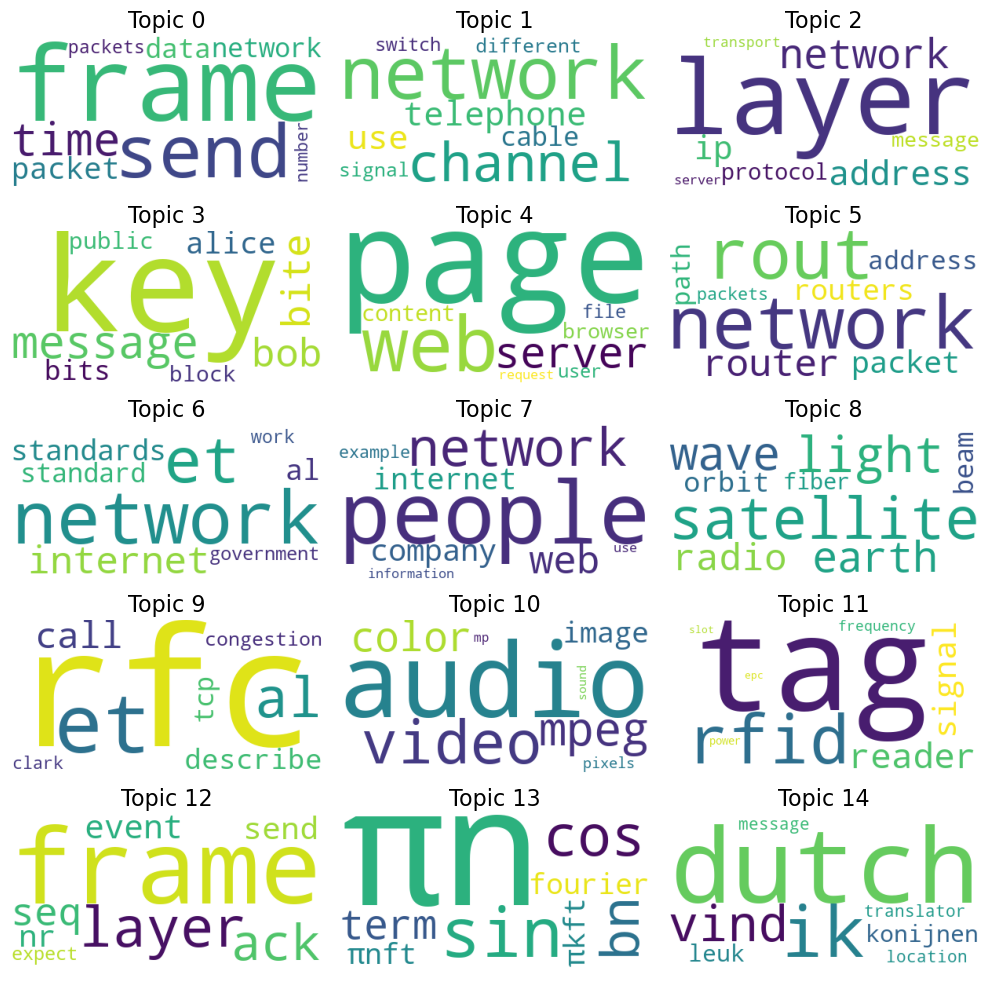

In [17]:

from matplotlib import pyplot as plt
from wordcloud import WordCloud
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color="white",mask=None, max_words=10,\
                        max_font_size=60,min_font_size=10,prefer_horizontal=0.9,
                        contour_width=3,contour_color='black')


fig, axes = plt.subplots(10,10, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = for_wcloud[i]
#     print(topic_words)
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [24]:
from gensim.models import CoherenceModel

cm_gsdmm = CoherenceModel(topics=topics,
                          dictionary=dictionary,
                          corpus=bow_corpus,
                          texts=prepro_data,
                          coherence='u_mass')

# get coherence value
coherence_gsdmm = cm_gsdmm.get_coherence()
print()
print("Coherence : ",coherence_gsdmm)


Coherence :  -4.8253443473075714


In [19]:
co_val= []
# get top words in topics
for i in range(5,26):
    print('\n',i)
    topics = top_words(gsdmm.cluster_word_distribution, top_index, i)
    cm_gsdmm = CoherenceModel(topics=topics, 
                          dictionary=dictionary, 
                          corpus=bow_corpus, 
                          texts=prepro_data, 
                          coherence='u_mass')
    # get coherence value
    coherence_gsdmm = cm_gsdmm.get_coherence()  
    co_val.append(coherence_gsdmm)
    print(coherence_gsdmm)


 5

Cluster 5 : {'frame': 0.31, 'send': 0.21, 'time': 0.18, 'packet': 0.16, 'data': 0.14}

Cluster 56 : {'network': 0.38, 'channel': 0.16, 'telephone': 0.16, 'use': 0.15, 'cable': 0.14}

Cluster 37 : {'layer': 0.33, 'network': 0.23, 'address': 0.17, 'ip': 0.15, 'protocol': 0.13}

Cluster 15 : {'key': 0.31, 'message': 0.21, 'bob': 0.16, 'bite': 0.16, 'alice': 0.15}

Cluster 21 : {'page': 0.31, 'web': 0.24, 'server': 0.17, 'content': 0.15, 'browser': 0.12}

Cluster 86 : {'network': 0.28, 'rout': 0.24, 'router': 0.2, 'packet': 0.15, 'routers': 0.13}

Cluster 9 : {'network': 0.25, 'et': 0.19, 'internet': 0.19, 'standards': 0.19, 'al': 0.19}

Cluster 39 : {'people': 0.25, 'network': 0.21, 'web': 0.21, 'company': 0.16, 'internet': 0.16}

Cluster 31 : {'satellite': 0.31, 'light': 0.21, 'wave': 0.18, 'earth': 0.17, 'radio': 0.14}

Cluster 87 : {'rfc': 0.24, 'et': 0.24, 'al': 0.24, 'call': 0.15, 'describe': 0.13}

Cluster 22 : {'audio': 0.24, 'video': 0.24, 'mpeg': 0.21, 'color': 0.16, 'image'

-3.875876024920698

 12

Cluster 5 : {'frame': 0.18, 'send': 0.12, 'time': 0.11, 'packet': 0.09, 'data': 0.08, 'network': 0.07, 'packets': 0.07, 'number': 0.06, 'sender': 0.06, 'station': 0.05, 'receiver': 0.05, 'congestion': 0.05}

Cluster 56 : {'network': 0.2, 'channel': 0.09, 'telephone': 0.08, 'use': 0.08, 'cable': 0.08, 'signal': 0.08, 'different': 0.07, 'switch': 0.07, 'call': 0.07, 'data': 0.06, 'time': 0.06, 'bandwidth': 0.06}

Cluster 37 : {'layer': 0.18, 'network': 0.13, 'address': 0.09, 'ip': 0.08, 'protocol': 0.07, 'message': 0.07, 'transport': 0.07, 'server': 0.06, 'connection': 0.06, 'service': 0.06, 'send': 0.06, 'data': 0.05}

Cluster 15 : {'key': 0.19, 'message': 0.13, 'bob': 0.1, 'bite': 0.1, 'alice': 0.1, 'bits': 0.08, 'public': 0.06, 'block': 0.05, 'send': 0.05, 'error': 0.05, 'plaintext': 0.05, 'trudy': 0.04}

Cluster 21 : {'page': 0.19, 'web': 0.15, 'server': 0.11, 'content': 0.09, 'browser': 0.08, 'file': 0.07, 'user': 0.06, 'request': 0.06, 'html': 0.06, 'progra

-4.203885791827126

 15

Cluster 5 : {'frame': 0.16, 'send': 0.1, 'time': 0.09, 'packet': 0.08, 'data': 0.07, 'network': 0.07, 'packets': 0.06, 'number': 0.06, 'sender': 0.05, 'station': 0.05, 'receiver': 0.05, 'congestion': 0.04, 'delay': 0.04, 'sequence': 0.04, 'window': 0.04}

Cluster 56 : {'network': 0.17, 'channel': 0.07, 'telephone': 0.07, 'use': 0.07, 'cable': 0.06, 'signal': 0.06, 'different': 0.06, 'switch': 0.06, 'call': 0.06, 'data': 0.05, 'time': 0.05, 'bandwidth': 0.05, 'station': 0.05, 'internet': 0.05, 'ethernet': 0.05}

Cluster 37 : {'layer': 0.16, 'network': 0.11, 'address': 0.08, 'ip': 0.07, 'protocol': 0.06, 'message': 0.06, 'transport': 0.06, 'server': 0.05, 'connection': 0.05, 'service': 0.05, 'send': 0.05, 'data': 0.05, 'tcp': 0.05, 'protocols': 0.04, 'link': 0.04}

Cluster 15 : {'key': 0.17, 'message': 0.12, 'bob': 0.09, 'bite': 0.09, 'alice': 0.09, 'bits': 0.07, 'public': 0.05, 'block': 0.04, 'send': 0.04, 'error': 0.04, 'plaintext': 0.04, 'trudy': 0.04, 'encryp

-4.654652129837789

 19

Cluster 5 : {'frame': 0.14, 'send': 0.09, 'time': 0.08, 'packet': 0.07, 'data': 0.06, 'network': 0.06, 'packets': 0.06, 'number': 0.05, 'sender': 0.04, 'station': 0.04, 'receiver': 0.04, 'congestion': 0.04, 'delay': 0.04, 'sequence': 0.04, 'window': 0.03, 'buffer': 0.03, 'transmit': 0.03, 'layer': 0.03, 'segment': 0.03}

Cluster 56 : {'network': 0.15, 'channel': 0.06, 'telephone': 0.06, 'use': 0.06, 'cable': 0.05, 'signal': 0.05, 'different': 0.05, 'switch': 0.05, 'call': 0.05, 'data': 0.05, 'time': 0.05, 'bandwidth': 0.04, 'station': 0.04, 'internet': 0.04, 'ethernet': 0.04, 'wireless': 0.04, 'mobile': 0.04, 'line': 0.04, 'service': 0.04}

Cluster 37 : {'layer': 0.14, 'network': 0.1, 'address': 0.07, 'ip': 0.06, 'protocol': 0.06, 'message': 0.05, 'transport': 0.05, 'server': 0.05, 'connection': 0.05, 'service': 0.05, 'send': 0.05, 'data': 0.04, 'tcp': 0.04, 'protocols': 0.04, 'link': 0.04, 'fig': 0.03, 'host': 0.03, 'use': 0.03, 'process': 0.03}

Cluster 15 : 

-4.826470270555759

 21

Cluster 5 : {'frame': 0.13, 'send': 0.09, 'time': 0.08, 'packet': 0.07, 'data': 0.06, 'network': 0.05, 'packets': 0.05, 'number': 0.05, 'sender': 0.04, 'station': 0.04, 'receiver': 0.04, 'congestion': 0.03, 'delay': 0.03, 'sequence': 0.03, 'window': 0.03, 'buffer': 0.03, 'transmit': 0.03, 'layer': 0.03, 'segment': 0.03, 'bite': 0.03, 'link': 0.03}

Cluster 56 : {'network': 0.14, 'channel': 0.06, 'telephone': 0.06, 'use': 0.05, 'cable': 0.05, 'signal': 0.05, 'different': 0.05, 'switch': 0.04, 'call': 0.04, 'data': 0.04, 'time': 0.04, 'bandwidth': 0.04, 'station': 0.04, 'internet': 0.04, 'ethernet': 0.04, 'wireless': 0.04, 'mobile': 0.04, 'line': 0.04, 'service': 0.03, 'fiber': 0.03, 'connect': 0.03}

Cluster 37 : {'layer': 0.13, 'network': 0.09, 'address': 0.07, 'ip': 0.06, 'protocol': 0.05, 'message': 0.05, 'transport': 0.05, 'server': 0.05, 'connection': 0.05, 'service': 0.05, 'send': 0.04, 'data': 0.04, 'tcp': 0.04, 'protocols': 0.03, 'link': 0.03, 'fig': 0.0

-4.984092441871307

 23

Cluster 5 : {'frame': 0.12, 'send': 0.08, 'time': 0.07, 'packet': 0.06, 'data': 0.06, 'network': 0.05, 'packets': 0.05, 'number': 0.04, 'sender': 0.04, 'station': 0.04, 'receiver': 0.04, 'congestion': 0.03, 'delay': 0.03, 'sequence': 0.03, 'window': 0.03, 'buffer': 0.03, 'transmit': 0.03, 'layer': 0.03, 'segment': 0.03, 'bite': 0.03, 'link': 0.03, 'bandwidth': 0.03, 'start': 0.02}

Cluster 56 : {'network': 0.13, 'channel': 0.06, 'telephone': 0.05, 'use': 0.05, 'cable': 0.05, 'signal': 0.05, 'different': 0.05, 'switch': 0.04, 'call': 0.04, 'data': 0.04, 'time': 0.04, 'bandwidth': 0.04, 'station': 0.04, 'internet': 0.04, 'ethernet': 0.04, 'wireless': 0.04, 'mobile': 0.03, 'line': 0.03, 'service': 0.03, 'fiber': 0.03, 'connect': 0.03, 'access': 0.03, 'send': 0.03}

Cluster 37 : {'layer': 0.13, 'network': 0.09, 'address': 0.06, 'ip': 0.06, 'protocol': 0.05, 'message': 0.05, 'transport': 0.05, 'server': 0.04, 'connection': 0.04, 'service': 0.04, 'send': 0.04, 'data'

-5.12119032181369

 25

Cluster 5 : {'frame': 0.12, 'send': 0.08, 'time': 0.07, 'packet': 0.06, 'data': 0.05, 'network': 0.05, 'packets': 0.05, 'number': 0.04, 'sender': 0.04, 'station': 0.04, 'receiver': 0.04, 'congestion': 0.03, 'delay': 0.03, 'sequence': 0.03, 'window': 0.03, 'buffer': 0.03, 'transmit': 0.03, 'layer': 0.03, 'segment': 0.03, 'bite': 0.03, 'link': 0.03, 'bandwidth': 0.02, 'start': 0.02, 'protocol': 0.02, 'tcp': 0.02}

Cluster 56 : {'network': 0.12, 'channel': 0.05, 'telephone': 0.05, 'use': 0.05, 'cable': 0.05, 'signal': 0.05, 'different': 0.04, 'switch': 0.04, 'call': 0.04, 'data': 0.04, 'time': 0.04, 'bandwidth': 0.04, 'station': 0.04, 'internet': 0.03, 'ethernet': 0.03, 'wireless': 0.03, 'mobile': 0.03, 'line': 0.03, 'service': 0.03, 'fiber': 0.03, 'connect': 0.03, 'access': 0.03, 'send': 0.03, 'wire': 0.03, 'traffic': 0.03}

Cluster 37 : {'layer': 0.12, 'network': 0.08, 'address': 0.06, 'ip': 0.06, 'protocol': 0.05, 'message': 0.05, 'transport': 0.05, 'server': 0.

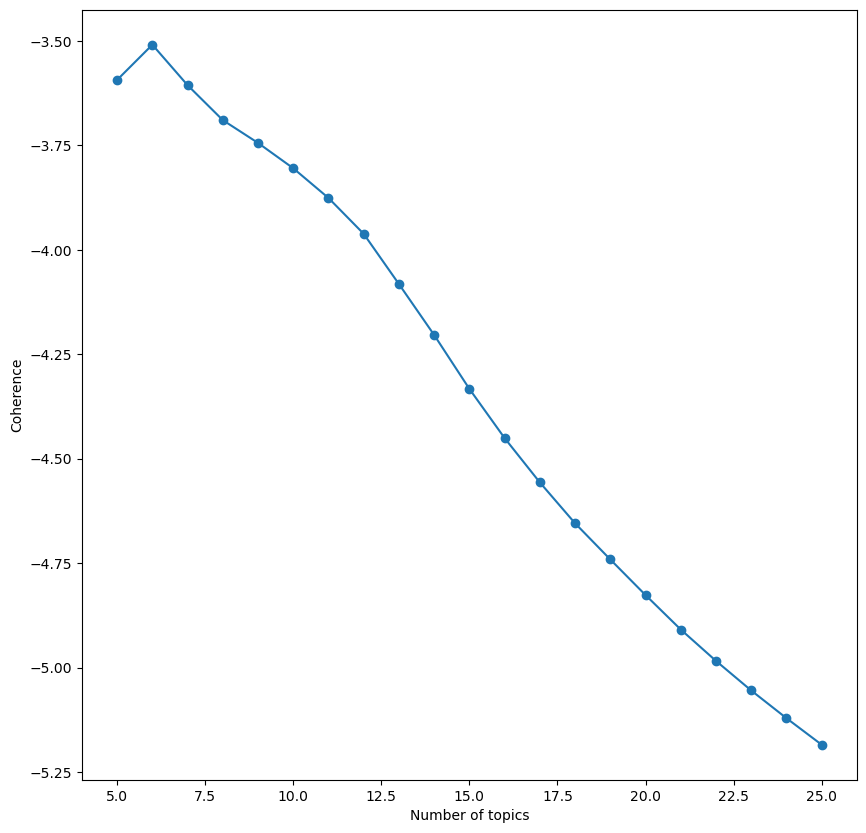

In [20]:
import matplotlib.pyplot as plt
axisy = list(range(5,26))
plt.figure(figsize=(10,10))
plt.plot(axisy,co_val,marker = 'o')
plt.xlabel("Number of topics")
plt.ylabel("Coherence")
plt.show()